### Задание 1

Представьте, что мы только открылись. Что будет через год, сколько клиентов?

Если:
* Стартовали с 1000 лидов в январе, когда у нас было 10 лидогенераторов (магазинов/точек продаж), при том, что: 
  - В марте, мае и декабре лидов в полтора раза больше, чем в остальные месяцы.
  - Доля повторных клиентов постепенно вырастет с 0% в начале года до 35% в конце года. 

* В начале каждого месяца открывается 2 дополнительных лидогенератора (магазина) 

In [21]:
from math import floor

leads_start = 1000
leads_per_gen = 100
leads_gen_start = 10
leads_gen_new = 2
coef = 1.5
months = list(range(1, 13))
cr_to_respond = 0.93
cr_new = 0.5
cr_old = 0.8
clients = 0
clents_old_ratio = 0


for month in months:
    if month not in [3, 5, 12]:
        leads_end = leads_gen_start * leads_per_gen
    else:
        leads_end = int(leads_gen_start * leads_per_gen * coef)
    
    clents_old_ratio += 0.02916667
    clients_old = floor(leads_end * cr_to_respond * clents_old_ratio * cr_old)
    clients_new = floor(leads_end * cr_to_respond * (1 - clents_old_ratio) * cr_new)
    clients = clients_old + clients_new
    
    leads_gen_start += leads_gen_new
    
    print(f'Month #:{month}')
    print(f'Leads this month: {leads_end}')
    print (f'Clients from old leads: {clients_old},\nClients from new leads: {clients_new},\nTotal clients: {clients}.')
    print()
    

print(f'Total clients one year later: {clients}.')

Month #:1
Leads this month: 1000
Clients from old leads: 21,
Clients from new leads: 451,
Total clients: 472.

Month #:2
Leads this month: 1200
Clients from old leads: 52,
Clients from new leads: 525,
Total clients: 577.

Month #:3
Leads this month: 2100
Clients from old leads: 136,
Clients from new leads: 891,
Total clients: 1027.

Month #:4
Leads this month: 1600
Clients from old leads: 138,
Clients from new leads: 657,
Total clients: 795.

Month #:5
Leads this month: 2700
Clients from old leads: 292,
Clients from new leads: 1072,
Total clients: 1364.

Month #:6
Leads this month: 2000
Clients from old leads: 260,
Clients from new leads: 767,
Total clients: 1027.

Month #:7
Leads this month: 2200
Clients from old leads: 334,
Clients from new leads: 814,
Total clients: 1148.

Month #:8
Leads this month: 2400
Clients from old leads: 416,
Clients from new leads: 855,
Total clients: 1271.

Month #:9
Leads this month: 2600
Clients from old leads: 507,
Clients from new leads: 891,
Total cli

### Задание 2
**Легенда**

Наша фирма оказывает услуги малому бизнесу:

Другие частные фирмы предлагают услуги по организации праздников и корпоративов.

Мы предоставляем им в аренду оборудование, а также привозим продукты от сторонних вендоров. С этими вендорами организаторы расчитаются сами после того, как состоится мероприятие, заплатят им за использованные продукты. Нам они оплачивают некоторую договорную премию.

Набор продуктов они выбирают на нашем сайте. По этому набору мы заранее можем понять, сколько будет стоить обслуживание (чистка и ремонт) нашего оборудования по итогу проведения. Фактически, у нас после формирования продуктовой корзины, еще до мероприятия, есть стоимость обслуживания, которая равна проценту от суммы заказа.

Доставка оборудования на место проведения и обратно для нас стоит 1400 руб.

Результаты работы фиксируем в базе данных из одной таблицы (она во вложении). *Для работы либо вставьте в excel данные из текста, либо переименуйте ее в csv и используйте более продвинутые аналитические инструменты: zeppelin, jupiter.* 

**Описание таблицы:**
* Rk – ключ-номер заказа;
* basket_exp_pct – относительная стоимость обслуживания, сколько в процентах от суммы заказа мы заплатим за чистку и ремонт оборудования, эту величину мы знаем заранее;
* volume_rub – стоимость заказа. Ее мы узнаем после того, как мероприятие состоится, т.к. из продуктов, которые мы подготовили, организаторы при проведении используют какую-то часть;
* margin_rub – прибыль. Ее мы рассчитываем по факту проведения: вычитаем из премии от организаторов стоимость обслуживания оборудования, зп сотрудников и прочие расходы на проведение (но стоимость доставки не вычтена, т.к. доставку мы оплачиваем независимо от факта проведения);
* party_prob – результат расчета модели, прогнозирующей, что мероприятие состоится. 

**Задание:**
Составьте модель бизнес-процесса, в котором работает система принятия решений.
1. Задайте отсечение как параметр
2. Моделируйте принятие решений по каждой заявке
3. Моделируйте метрики процесса
4. Постройте график ожидаемой прибыли в зависимости от отсечения, найдите точку максимума целевой переменной (ожидаемой прибыли).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data from csv file
df = pd.read_csv('analyst_course_applic3.zip', compression='zip', sep=';')

df

,rk,basket_exp_pct,volume_rub,margin_rub,party_prob
0,5445886112,"-0,00899796",43434,"2104,727278","0,913275716"
1,2725229115,"-0,008812285",50624,"2081,634147","0,914223036"
2,5895389205,"-0,007648916",92993,"1973,144091","0,920158593"
3,7611900375,"-0,013011705",25210,"2085,563575","0,892797421"
4,5518526672,"-0,013879323",23270,"2077,467619","0,8883708"
...,...,...,...,...,...
29639,6291682573,"-0,08679635",26010,"708,0194331","0,516345155"
29640,3633529495,"-0,086585076",28086,"664,4156264","0,517423084"
29641,9864903556,"-0,079615124",54243,"188,4118497","0,55298406"
29642,3633529495,"-0,086585076",28086,"664,4156264","0,517423084"


In [3]:
# checking basic info about dataset (data types and missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29644 entries, 0 to 29643
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rk              29644 non-null  int64 
 1   basket_exp_pct  29644 non-null  object
 2   volume_rub      29644 non-null  object
 3   margin_rub      29644 non-null  object
 4   party_prob      29644 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [4]:
# removing '-' from basket_exp_pct
df.basket_exp_pct = df.basket_exp_pct.apply(lambda x: x[1:])

In [5]:
# replacing ',' with '.' to convert numbers from string to numeric (int/float) data format
df[['basket_exp_pct', 'margin_rub', 'party_prob', 'volume_rub']] = df[['basket_exp_pct', 'margin_rub', 'party_prob', 'volume_rub']].apply(lambda x: x.str.replace(',', '.'))

df

,rk,basket_exp_pct,volume_rub,margin_rub,party_prob
0,5445886112,0.00899796,43434,2104.727278,0.913275716
1,2725229115,0.008812285,50624,2081.634147,0.914223036
2,5895389205,0.007648916,92993,1973.144091,0.920158593
3,7611900375,0.013011705,25210,2085.563575,0.892797421
4,5518526672,0.013879323,23270,2077.467619,0.8883708
...,...,...,...,...,...
29639,6291682573,0.08679635,26010,708.0194331,0.516345155
29640,3633529495,0.086585076,28086,664.4156264,0.517423084
29641,9864903556,0.079615124,54243,188.4118497,0.55298406
29642,3633529495,0.086585076,28086,664.4156264,0.517423084


In [6]:
# converting data types
df = df.astype({'basket_exp_pct': 'float',
                'volume_rub': 'float',
                'margin_rub': 'float',
                'party_prob': 'float'})

In [7]:
# calc expected expenses in rub
df['basket_exp_rub'] = df['volume_rub'] * df['basket_exp_pct'] * df['party_prob']

In [8]:
# calc revenue
df['revenue'] = df['margin_rub'] * df['party_prob'] - df['basket_exp_rub'] - 800

df

,rk,basket_exp_pct,volume_rub,margin_rub,party_prob,basket_exp_rub,revenue
0,5445886112,0.008998,43434.0,2104.727278,0.913276,356.924036,765.272276
1,2725229115,0.008812,50624.0,2081.634147,0.914223,407.846887,695.231003
2,5895389205,0.007649,92993.0,1973.144091,0.920159,654.504800,361.100690
3,7611900375,0.013012,25210.0,2085.563575,0.892797,292.859948,769.125833
4,5518526672,0.013879,23270.0,2077.467619,0.888371,286.918757,758.642813
...,...,...,...,...,...,...,...
29639,6291682573,0.086796,26010.0,708.019433,0.516345,1165.686913,-1600.104509
29640,3633529495,0.086585,28086.0,664.415626,0.517423,1258.284174,-1714.500191
29641,9864903556,0.079615,54243.0,188.411850,0.552984,2388.096596,-3083.907846
29642,3633529495,0.086585,28086.0,664.415626,0.517423,1258.284174,-1714.500191


In [9]:
# getting total revenue
df.revenue.sum()  # our business produces losses!

-5168087.17904816

In [10]:
# rounding and converting to pct basket_exp_pct
df['exp_pct_rounded'] =  round(df['basket_exp_pct'] * 100, 1)

df

,rk,basket_exp_pct,volume_rub,margin_rub,party_prob,basket_exp_rub,revenue,exp_pct_rounded
0,5445886112,0.008998,43434.0,2104.727278,0.913276,356.924036,765.272276,0.9
1,2725229115,0.008812,50624.0,2081.634147,0.914223,407.846887,695.231003,0.9
2,5895389205,0.007649,92993.0,1973.144091,0.920159,654.504800,361.100690,0.8
3,7611900375,0.013012,25210.0,2085.563575,0.892797,292.859948,769.125833,1.3
4,5518526672,0.013879,23270.0,2077.467619,0.888371,286.918757,758.642813,1.4
...,...,...,...,...,...,...,...,...
29639,6291682573,0.086796,26010.0,708.019433,0.516345,1165.686913,-1600.104509,8.7
29640,3633529495,0.086585,28086.0,664.415626,0.517423,1258.284174,-1714.500191,8.7
29641,9864903556,0.079615,54243.0,188.411850,0.552984,2388.096596,-3083.907846,8.0
29642,3633529495,0.086585,28086.0,664.415626,0.517423,1258.284174,-1714.500191,8.7


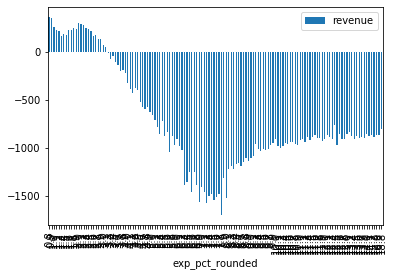

In [11]:
# plotting revenue VS exp_pct
df.groupby('exp_pct_rounded', as_index=False) \
    .agg({'revenue': 'mean'}).plot(kind='bar', x='exp_pct_rounded', y='revenue');

In [12]:
# finding cut-off percentage when revenue is above zero
cutoff_level = df.groupby('exp_pct_rounded', as_index=False) \
    .agg({'revenue': 'mean'}).query('revenue > 0').tail(1).exp_pct_rounded.values[0]

cutoff_level

3.1

In [13]:
# getting total revenue with cut-off percentage
profit = df[df['exp_pct_rounded'] <= 3.1].revenue.sum()
profit
# now our business gains profit!

3400590.4462530026

### Задание 3  
В продолжение кейса.

После введения системы принятия решений на сайте вендоры увидели спад продаж (ведь по части заказов мы начали отказывать)

Вендоры готовы заплатить нам x% от суммы заказа, если мы поможем им продать товаров на 550 млн руб (в рамках того объема заявок, который лежит в нашей базе)

Найдите минимальный x%, такой, чтобы мы не потеряли в чистой прибыли, согласившись увеличить объем продаж.

Границу по basket_exp_pct, до которой принимаем заказ нужно будет двигать, чтобы снова нарастить объем продаж


Комментарии:
* Взять стоимость доставки 800 руб, как в лекции .
* Считать, что стоимость доставки и стоимость обслуживания не входят в margin_rub.

In [14]:
# calculating volume
df['volume'] = df['volume_rub'] * df['party_prob']

In [15]:
# finding new cut-off level to have 550 mln rub volume
while df[df['exp_pct_rounded'] <= cutoff_level].volume.sum() < 550000000:
    cutoff_level += 0.1
    
print(cutoff_level)

4.599999999999999


In [16]:
# defining the precise volume with a new cut-off level
req_volume = df[df['exp_pct_rounded'] <= cutoff_level].volume.sum()
req_volume

551592702.5719283

In [17]:
# adding column revenue_with_bonus
bonus = 0.0
df['revenue_with_bonus'] = df['margin_rub'] * df['party_prob'] - df['basket_exp_rub'] - 800 + df['volume'] * bonus

In [18]:
# finding the size of a bonus to have 550 mln rub volume for vendors and for our business to keep the profit level
while df[df['exp_pct_rounded'] <= cutoff_level].revenue_with_bonus.sum() < profit:
    bonus += 0.0001
    df['revenue_with_bonus'] = df['margin_rub'] * df['party_prob'] - df['basket_exp_rub'] - 800 + df['volume'] * bonus

profit_with_bonus = df[df['exp_pct_rounded'] <= cutoff_level].revenue_with_bonus.sum()
    
print(f'Cut-off level of {cutoff_level:.1f}% will provide the required volume for vendors of {req_volume:.0f} rub.')
print(f'Bonus from vendors should be {bonus:.2%} if we want to keep our profit level of {profit_with_bonus:.0f} rub.')

Cut-off level of 4.6% will provide the required volume for venders of 551592703 rub.
Bonus from vendors should be 0.23% if we want to keep our profit level of 3419334 rub
